<!-- ## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe -->

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


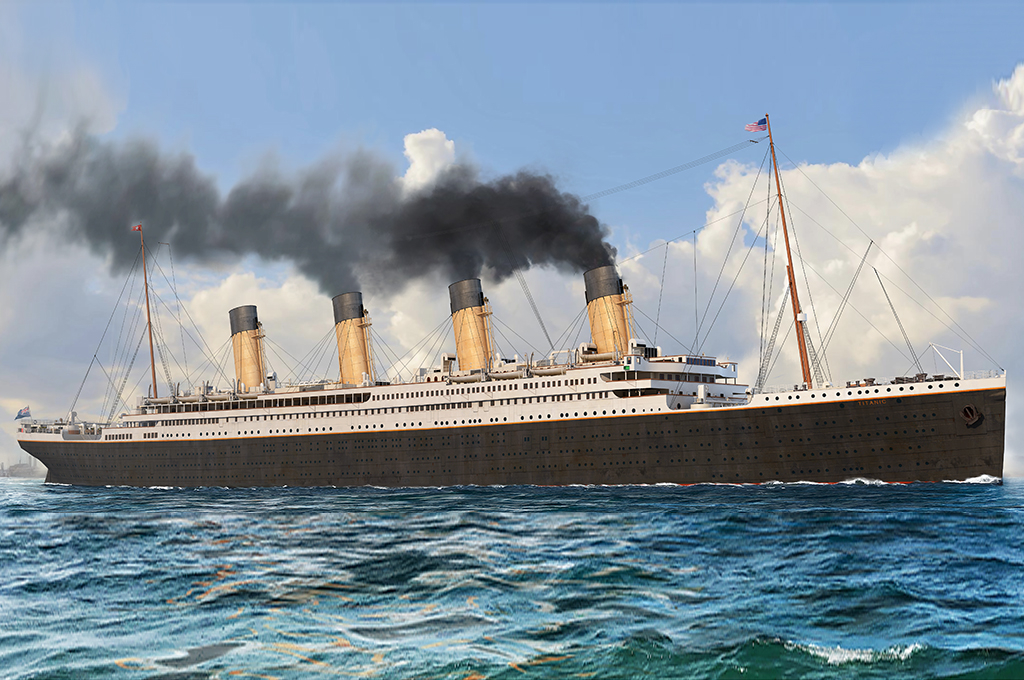

# O danych
Analiza opiera się na historycznym zbiorze danych pasażerów RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą lodową. Zbiór zawiera informacje demograficzne i podróżne, takie jak wiek, płeć, klasa biletu, relacje rodzinne na pokładzie, cena biletu czy miejsce zaokrętowania. Kluczową zmienną jest informacja, czy pasażer przeżył katastrofę. W sumie Titanic przewoził ponad 2200 osób, z czego ponad 1500 zginęło, co czyni tę tragedię jedną z najpoważniejszych w historii żeglugi.

In [232]:
df = pd.read_csv('titanic.csv', sep=",")

# Eksploracyjna analiza danych na temat katastrofy Tytanica

## 1. Wstępna analiza danych

### 1. Podstawowe informacje o danych

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


### 2. Zobaczmy podsumowanie wszystkich kolumn numerycznych

In [234]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000



- Możemy zaobserwować, że średnia cena za bilet wynosiła 33,3 dolary
- Możemy poweidze, że kolumna survived nie ma tu sensu, gdyż 1 oznacza że osoba przeżyła, a 0, że zginęła, a NaN, że niewiadomo
- widzimy też, że na 1 pasarzera średnio przypadało 0,5 rodzeństwa i 0,39 rodzica czyli nie było wiele dzieci w porównoiu do inych pasarzerów

## 2. Szukamy duplikatów i brakujących wartości

In [235]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Widzimy, że brakuje wiele informacji o:
- wieku pasażerów, 
- numerów kabin, 
- numerów ciał, dużo pażerów ciał nie odnaleziono, a także niektórzy przeżyli
- łodzi ratunkowych, dlatego że wielu pasażerów nie byo w łodziach i nie przeżyło
- końcowych destynacji

### 2. Szukamy duplikatów

In [236]:
df.duplicated().sum()

0

Brak duplikatów

## 3. Naprawimy kolumny z brakującymi wartościami

### 1. Tworzymy dataframe, gdzie brakujace wartości wieku uzupełniamy średnią wieku z danej klasy, a brakujące wartości opłaty za bilet medianą z danej klasy 

In [237]:
drop_age_df=df.dropna(subset="age")
# df=df_aged_droped.dropna(subset="age")

In [238]:

df["age"] = df["age"].fillna(df.groupby("pclass")["age"].transform("mean"))
df["fare"] = df["fare"].fillna(df.groupby("pclass")["fare"].transform("median"))
# df=df.dropna()

### 2. Możemy stworzyć Data frame wyrzucimy wiersze z brakującą płcią

In [239]:
df = df.dropna(subset=["sex"])


## 4. Analizujemy poszczególne kolumny

### 1. Przeanalizujmy ile było na pokładzie ludzi rozróżniając ich płci

In [240]:
sex_count=df["sex"].value_counts()

df_sex_grouped=(df.groupby("sex").agg(
    sum_sex=("sex", "value_counts")
)).reset_index()

df_sex_grouped["sex"] = df_sex_grouped["sex"].replace({
    "female": "Kobiety",
    "male": "Mężczyżni"
})


In [241]:
# df_sex_grouped


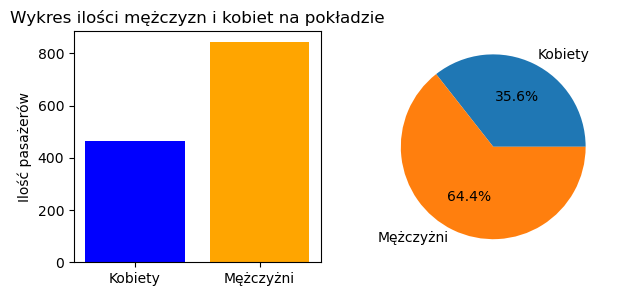

In [242]:
fig, ax=plt.subplots(1,2, figsize=(7,3))

color=sns.color_palette("colorblind6")
ax[0].bar(df_sex_grouped["sex"],df_sex_grouped["sum_sex"], color=["blue", "orange"]);
ax[0].set_title("Wykres ilości mężczyzn i kobiet na pokładzie")
ax[0].set_ylabel("Ilość pasażerów");

# sex_count.plot(kind="pie",autopct='%1.1f%%', labels=[], data=);
ax[1].pie(x="sum_sex", labels="sex",autopct='%1.1f%%', data=df_sex_grouped);

Widzimy, że na pokładzie znajdowało się **dużo więcej** mężczyzn niż kobiet, a dokładniej mężczyźni stanowili `64,4%`pasażerów a kobiety `35,6%`

### 2. Sprawdzamy ile było kobiet i ile mężczyzn w poszczególnych klasach

In [243]:
pclass_gruped_sex_df=(df.groupby("pclass").agg(
    sex_count=("sex", "value_counts")
).reset_index())
# pclass_gruped_sex_df

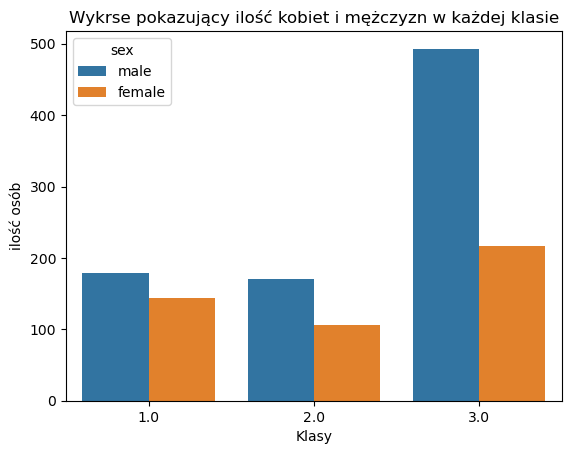

In [244]:
sns.barplot(x="pclass", y="sex_count", hue="sex", data=pclass_gruped_sex_df);
plt.title("Wykrse pokazujący ilość kobiet i mężczyzn w każdej klasie");
plt.ylabel("ilość osób");
plt.xlabel("Klasy");

Możemy zaobserwować, że:
- w klasie 1 była podobna ilość mężczyzn i kobiet i wynosiła od `160 do 180`
- w klasie 2 większość stanowili mężczyźni było ich `ok 160`, a kobiet `około 110`
- w klasie 3 natomiast ogromną większość stanowili mężczyźni było `ich około 500`, natomiast kobiet było `200`

### 3. Sprawdżmy dane dotyczące cen bletów w poszczególnych klasach

In [245]:
classs_1_df=df[df["pclass"]==1]
# zmienna przechowująca dane tabelarycze 1 klasy

classs_2_df=df[df["pclass"]==2]
# zmienna przechowująca dane tabelarycze 2 klasy

classs_3_df=df[df["pclass"]==3]
# zmienna przechowująca dane tabelarycze 3 klasy


In [246]:
pclass_gruped_ticket_fare_df=df.groupby("pclass").agg({
    "fare":["mean","median","max","min",]
})
pclass_gruped_ticket_fare_df

fare                        
             mean   median       max  min
pclass                                   
1.0     87.508992  60.0000  512.3292  0.0
2.0     21.179196  15.0458   73.5000  0.0
3.0     13.295480   8.0500   69.5500  0.0

#### 1. Wykres słupkowy danych o cenach biletów

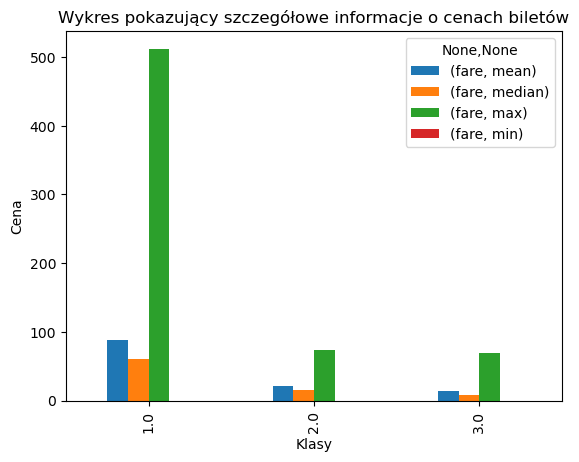

In [247]:
pclass_gruped_ticket_fare_df.plot(kind="bar");
plt.title("Wykres pokazujący szczegółowe informacje o cenach biletów");
plt.ylabel("Cena");
plt.xlabel("Klasy");

Możemy zauważyć, że:
- maksymalna cena za bilet w 1 klasie, czyli najlepszej klasie była duża, **5 razy większa niż średnia cena** biletów w tej klasie, **w drugiej klasie** też była znacząco większa od śreniej, tak samo jak w 1 klasie
- mediana wartości w pierwszej klasie pokazuje nam, **że większość cen** biletów oscylowały około średniej lub były od nie niższe 
- niektórzy pasarzerowie statku nie płacili za rejs

#### 2. Spożądźmy dane, które nam zobrazują jedynie bilety, które były płatne

In [248]:
no_free_tickts_df=df[df["fare"]>0]

In [249]:
pclass_gruped_no_free_ticket_fare_df=no_free_tickts_df.groupby("pclass").agg({
    "fare":["mean","median","max","min",]
})
pclass_gruped_no_free_ticket_fare_df

fare                           
             mean   median       max     min
pclass                                      
1.0     89.447482  61.3792  512.3292  5.0000
2.0     21.648108  15.0500   73.5000  9.6875
3.0     13.370915   8.0500   69.5500  3.1708

#### 3. Wykres słupkowy dany o cenach bieltów jedynie płatnych

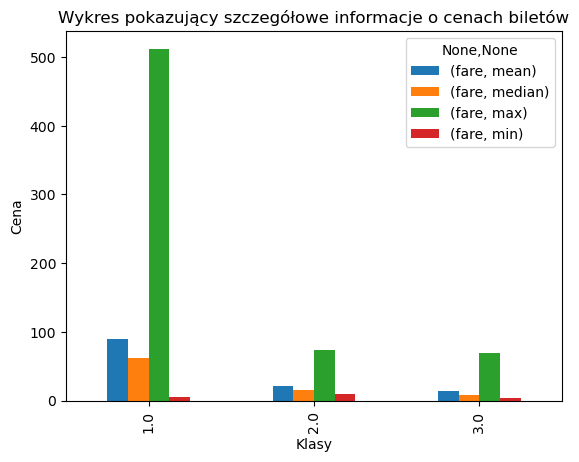

In [250]:
pclass_gruped_no_free_ticket_fare_df.plot(kind="bar");
plt.title("Wykres pokazujący szczegółowe informacje o cenach biletów");
plt.ylabel("Cena");
plt.xlabel("Klasy");

Widzimy, że **minimalne ceny** za bilet w każdej klasie **znacząco odbiegały** od maksymalych cen za bilet, czy średnej

#### 4. Podsumowanie informacji o biletach platnych

In [251]:
pclass_gruped_ticket_fare__desc_df=no_free_tickts_df.groupby("pclass")
pclass_gruped_ticket_fare__desc_df["fare"].describe()


,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1.0,316.0,89.447482,80.259713,5.0000,31.682275,61.3792,108.9000,512.3292
2.0,271.0,21.648108,13.382064,9.6875,13.000000,15.0500,26.0000,73.5000
3.0,705.0,13.370915,11.476600,3.1708,7.750000,8.0500,15.2458,69.5500


W **każdej z 3 klas** widzimy, że wartości biletów *oscylowały wokół średniej*, bo `nawet 75%` było do niej zbliżone, a tylko nieliczne były znacznie droższe 

#### 5. Histogram cen biletów w klasach

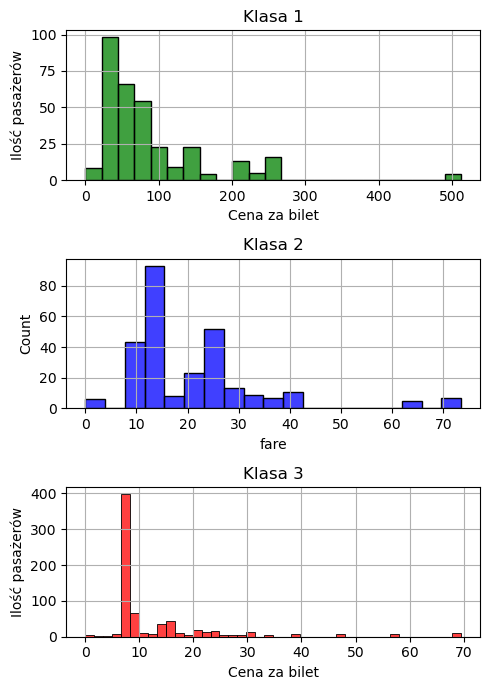

In [252]:
fig, ax = plt.subplots(3, 1, figsize=(5, 7))  # zwiększ wysokość

sns.histplot(x="fare", data=classs_1_df, color="green", ax=ax[0])
sns.histplot(x="fare", data=classs_2_df, color="blue", ax=ax[1])
sns.histplot(x="fare", data=classs_3_df, color="red", ax=ax[2])

# Opcjonalnie: dodaj tytuły do każdego wykresu
ax[0].set_title("Klasa 1")
ax[0].set_xlabel("Cena za bilet")
ax[0].set_ylabel("Ilość pasażerów")
ax[0].grid(True)
ax[1].set_title("Klasa 2")
ax[2].set_xlabel("Cena za bilet")
ax[2].set_ylabel("Ilość pasażerów")
ax[1].grid(True)
ax[2].set_title("Klasa 3")
ax[2].set_xlabel("Cena za bilet")
ax[2].set_ylabel("Ilość pasażerów")
ax[2].grid(True)

plt.tight_layout()
plt.show()


Możemy zobaczyć, że każdy z tych histogramów ma podobna budowę i pokazują, że **najwięcej w każdej klasie** zostało sprzedanych jednych z *tańszych biletów* w puli całej klasy

### 4. Sprawdźmy informaje o wieku pasażerów z różnych klas

In [253]:
grouped_pclass_df=df.groupby("pclass")

pclass_grouped_age_df=(grouped_pclass_df.agg({
    "age":["mean", "median", "min", "max"]
}))
# pclass_grouped_age_df["age"].describe()

#### 1. Histogramy wieku

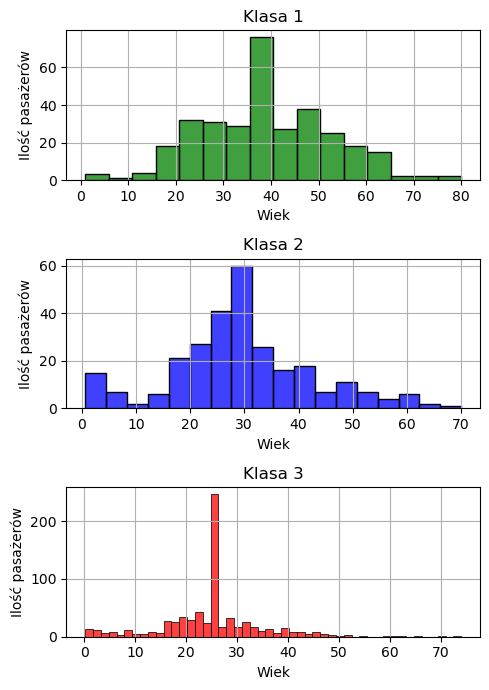

In [254]:
fig, ax = plt.subplots(3, 1, figsize=(5, 7))  # zwiększ wysokość

sns.histplot(x="age", data=classs_1_df, color="green", ax=ax[0])
sns.histplot(x="age", data=classs_2_df, color="blue", ax=ax[1])
sns.histplot(x="age", data=classs_3_df, color="red", ax=ax[2])

# Opcjonalnie: dodaj tytuły do każdego wykresu
ax[0].set_title("Klasa 1")
ax[0].grid(True)
ax[0].set_xlabel("Wiek")
ax[0].set_ylabel("Ilość pasażerów");

ax[1].set_title("Klasa 2")
ax[1].grid(True)
ax[1].set_xlabel("Wiek")
ax[1].set_ylabel("Ilość pasażerów");

ax[2].set_title("Klasa 3")
ax[2].grid(True)
ax[2].set_xlabel("Wiek")
ax[2].set_ylabel("Ilość pasażerów");

plt.tight_layout()
plt.show()

Na podstawie każgo z 3 histogramów możmy zauważyć, że w każdej klasię **największą** liczbę pasażerów stanowili ludzie od około` 20 do 30 roku` życia, a **najmniejszą** grupę stanwowili seniorzy od `65 do 70 roku` życia

#### 2. Szczególowe informacje dotyczące wieku

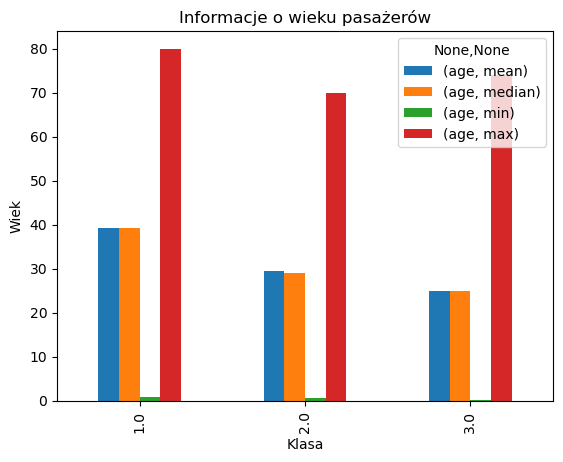

In [255]:
pclass_grouped_age_df.plot(kind="bar");
plt.title("Informacje o wieku pasażerów")
plt.ylabel("Wiek");
plt.xlabel("Klasa");

Możemy zauważyć, że:
- na pokładzie znajdowały się osoby nawet `do 80 roku` życia
- w każdej z klas średia wieku pasażrów jest zbliżona do mediany, czyli, `że 50% `pasażerów miało wiek mniejszy lub równy średniej w poszczególnej klasie

### 5. Przeanalizujmy kolumnę z ocaleńcami

#### 1. Tworzymy wykres ile mężczyzn i kobiet przeżyło

In [ ]:

df_sex=df.copy()

# df_sex["sex"]=df_sex["sex"].map(
#     {
#         "female":0,
#         "male":1

#     }
# )
df_sex_survived_grouped=(df_sex.groupby("sex").agg(
    sum_survived=("survived", "sum"),
)).reset_index()

In [269]:
df_sex_survived_grouped

,sex,sum_survived
0,female,339.0
1,male,161.0


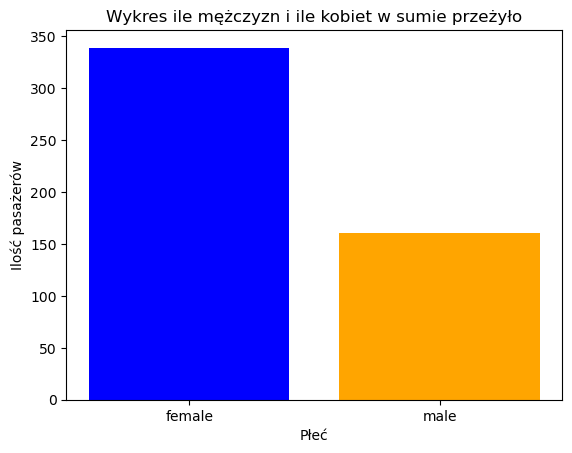

In [275]:
plt.bar(df_sex_survived_grouped["sex"], df_sex_survived_grouped["sum_survived"], color=["blue", "orange"])
plt.title("Wykres ile mężczyzn i ile kobiet w sumie przeżyło")
plt.xlabel("Płeć")
plt.ylabel("Ilość pasażerów");

Z wykresu widzimy , że **przeżyło więcej** kobiet, niż mężczyzn, bo przeżyło` ok. 340 kobiet` i `około 155 mężczyzn`

#### 2. Analiza szans na przeżycie pasażerów w poszczególnych klasach

In [ ]:
# pcalss_survived_grouped_df=df[df["survived"]==1]

pcalss_grouped_df = (df.groupby(['pclass']).agg(
    survived_sum= ("survived", "sum"),
    survived_count= ("survived", "count")
)).reset_index()


pcalss_grouped_df["percentage_survived"]=(pcalss_grouped_df["survived_sum"]/pcalss_grouped_df["survived_count"])*100


In [ ]:
# 
# pcalss_grouped_df.style.background_gradient(subset="percetage_survived",cmap=cm, axis=0)

def class_color(row):
    if row['pclass'] == 1:
        return ['background-color: green' if col == 'pclass' else '' for col in row.index]
    elif row['pclass'] == 2:
        return ['background-color: red' if col == 'pclass' else '' for col in row.index]
    elif row['pclass'] == 3:
        return ['background-color: blue' if col == 'pclass' else '' for col in row.index]
    else:
        return ['' for _ in row.index]
    
def validate_count(row):
    if row['survived_count'] < 3:
        return ['background-color: red' if col == 'survived_count' else '' for col in row.index]
    if row['survived_count'] < 9:
        return ['background-color: orange' if col == 'survived_count' else '' for col in row.index]
    else:
        return ['' for _ in row.index]



def style_df(styler):

    cm=sns.light_palette(color="green", as_cmap=True)
    return(
        styler
        # .highlight_max(axis=0, props='color:white;background-color:darkgreen')
        # .highlight_min(axis=0, props='color:white;background-color:darkred')
        .apply(class_color, axis=1)
        .background_gradient(subset="percentage_survived",cmap=cm, axis=0)
        .apply(validate_count, axis=1)
        # .format(temperature_description, subset=["temperature"])
        # .format(humidity_description, subset=["humidity"])
    )




1. Tabela ogólnych szans na przeżycie w klasach

In [ ]:
pcalss_grouped_df.style.pipe(style_df)

,pclass,survived_sum,survived_count,percentage_survived
0,1.000000,200.000000,323,61.919505
1,2.000000,119.000000,277,42.960289
2,3.000000,181.000000,709,25.528914


Widzimy, że:
- pasażerowie w **1 klasie** mieli `62%` szans na przeżycie
- pasażerowie w **3 klasie** mieli `25%` sznas na przeżycie

2. Wykres szans nz przeżycie w poszczególnych klasach

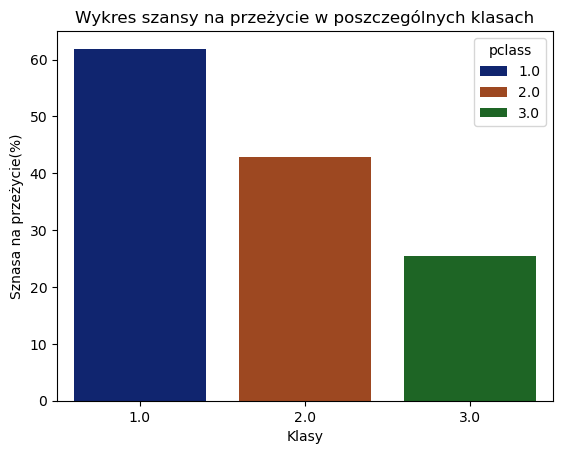

In [ ]:
sns.barplot(x="pclass", y="percentage_survived", data=pcalss_grouped_df, hue="pclass", palette="dark");
plt.title("Wykres szansy na przeżycie w poszczególnych klasach")
plt.xlabel("Klasy")
plt.ylabel("Sznasa na przeżycie(%)");

Widzimy, że najwięcej procentowo szans na przeżycie mieli pasażerowie `1 klasy` a najmniejsze `3 klasy`

#### 3. Wykres ocalałych w różnych klasach z rozróżnieniem na płci

In [ ]:
pcalss_survived_sex_grouped_df = df.groupby(['pclass', "sex"]).agg(
    survived_sum= ("survived", "sum"),
    survived_count= ("survived", "count")
).reset_index()


pcalss_survived_sex_grouped_df["percentage_survived"]=(pcalss_survived_sex_grouped_df["survived_sum"]/pcalss_survived_sex_grouped_df["survived_count"])*100


1. Tabela pomocnicza

In [ ]:
pcalss_survived_sex_grouped_df.style.pipe(style_df)


,pclass,sex,survived_sum,survived_count,percentage_survived
0,1.000000,female,139.000000,144,96.527778
1,1.000000,male,61.000000,179,34.078212
2,2.000000,female,94.000000,106,88.679245
3,2.000000,male,25.000000,171,14.619883
4,3.000000,female,106.000000,216,49.074074
5,3.000000,male,75.000000,493,15.212982


Na podstawie tabeli widzimy, że katastrofę przeżyło `ok. 97%` pasażerek **z 1 klasy**

2. Wykres pokazujący szanse na przeżycie kobiet i mężczyzn

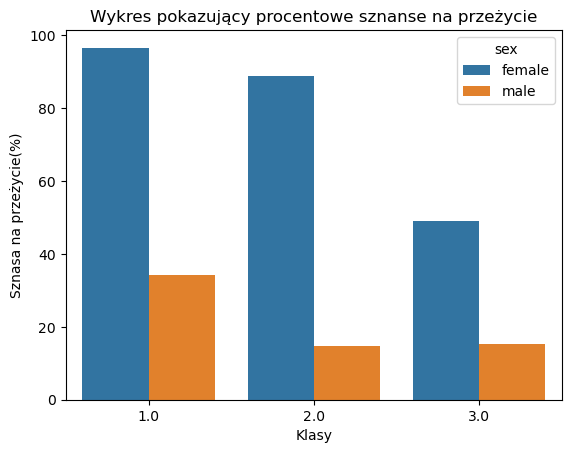

In [ ]:
sns.barplot(x="pclass", y="percentage_survived", hue="sex", data=pcalss_survived_sex_grouped_df);
plt.title("Wykres pokazujący procentowe sznanse na przeżycie");
plt.ylabel("Sznasa na przeżycie(%)");
plt.xlabel("Klasy");

Możemy zauważyć, że:
* kobiety miały dużo większe sznase na przeżycie katastrofy, szczególnie z klasy **1 i 2** gdzie przeżyło około lub ponad `90% kobiet` z tych klas
* mężczyźni niezależnie od klasy mieli bardzo małe szanse na przeżycie, bo mniejsze niż `35%`

## 5. Znajdywanie wzorców i korelacji w danych

### 1. Badanie korelacji dla pasażerów co do ich wieku

In [ ]:
def apply_age_groups_numbers(age):
    if age < 19:
        return 1
    elif age < 30:
        return 2
    elif age < 45:
        return 3
    elif age < 60:
        return 4
    elif age >= 60:
        return 5
    else:
        return 6

In [ ]:
def apply_age_groups(age):
    if age < 19:
        return "0-18"
    elif age < 30:
        return "18-29"
    elif age < 45:
        return "30-44"
    elif age < 60:
        return "45-59"
    elif age >= 60:
        return "60+"
    else:
        return "Unknown"

In [ ]:
age_group_df=df.copy()
age_group_df["Age_group_number"]=age_group_df["age"].apply(apply_age_groups_numbers)
age_group_df["Age_group"]=age_group_df["age"].apply(apply_age_groups)

gruped_age_df=(age_group_df.groupby(["Age_group", "Age_group_number","pclass"] ).agg(
    survived_sum=("survived", "sum"),
    survived_count=("survived", "count")
).reset_index())

gruped_age_df["percentage_survived"]=(gruped_age_df["survived_sum"]/gruped_age_df["survived_count"])*100


In [ ]:
# 
# pcalss_grouped_df.style.background_gradient(subset="percetage_survived",cmap=cm, axis=0)

def age_group_color(row):
    color_map = {
        "0-18": "orange",
        "18-29": "lightgreen",
        "30-44": "lightblue",
        "45-59": "khaki",
        "60+": "violet",
        "Unknown": "lightgray"
    }
    age_group = row['Age_group']
    color = color_map.get(age_group, '')
    return [f'background-color: {color}; color: black' if col == 'Age_group' else '' for col in row.index]


def style_with_age_df(styler):

    cm=sns.light_palette(color="green", as_cmap=True)
    return(
        styler
        # .highlight_max(axis=0, props='color:white;background-color:darkgreen')
        # .highlight_min(axis=0, props='color:white;background-color:darkred')
        .apply(class_color, axis=1)
        .background_gradient(subset="percentage_survived",cmap=cm, axis=0)
        .apply(validate_count, axis=1)
        .apply(age_group_color, axis=1)
        # .format(temperature_description, subset=["temperature"])
        # .format(humidity_description, subset=["humidity"])
    )




1. Tabela obrazująca szanse na przeżycie wszytskich pasażerów, uwzględniając wiek

In [ ]:
gruped_age_df.style.pipe(style_with_age_df)

,Age_group,Age_group_number,pclass,survived_sum,survived_count,percentage_survived
0,0-18,1,1.000000,18.000000,21,85.714286
1,0-18,1,2.000000,31.000000,43,72.093023
2,0-18,1,3.000000,46.000000,132,34.848485
3,18-29,2,1.000000,40.000000,57,70.175439
4,18-29,2,2.000000,46.000000,114,40.350877
5,18-29,2,3.000000,106.000000,426,24.882629
6,30-44,3,1.000000,82.000000,132,62.121212
7,30-44,3,2.000000,31.000000,85,36.470588
8,30-44,3,3.000000,24.000000,123,19.512195
9,45-59,4,1.000000,50.000000,87,57.471264


1. Wykres obrazujący szanse na przeżycie wszytskich pasażerów, uwzględniając wiek

Mając bardzo dużo danych możemy powiedzieć, że w **klasie 3** katastrofę przeżyła bardzo mała ilość mężczyzn, bo `1/5` w wieku `30-44`


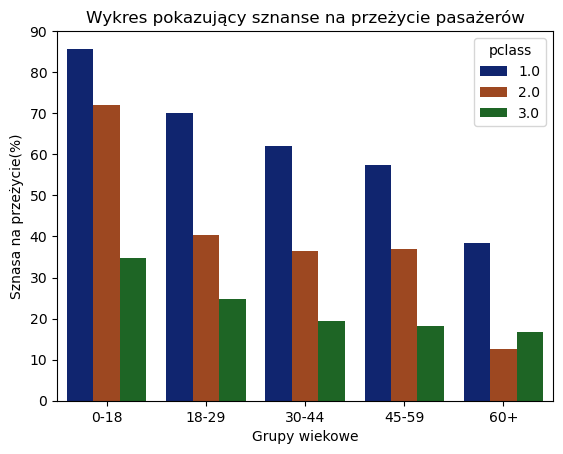

In [ ]:
sns.barplot(x="Age_group", y="percentage_survived", data=gruped_age_df, hue="pclass", palette="dark");
plt.title("Wykres pokazujący sznanse na przeżycie pasażerów")
plt.xlabel("Grupy wiekowe")
plt.ylabel("Sznasa na przeżycie(%)");


Na wykresie obserwujemy, że:
* pasażerowei w wieku **0-18** klasy **1 i 2** mieli duże szanse na przeżycie które sięgały,` kolejno 84% i 72%`

* Za to **najmniejsze szanse** na przeżycie katastrofy mieli pasażerowie w wieku **60+** porównując z innymi kategoriami wiekowymi w obrębie jednej klasy


#### 2. Sprawdźmy teraz jak wygląda korelacja gdy pasażerów rozdzielimy na płcie

In [ ]:
# male_df=df[df["sex"]=="male"]
# # data frame samych mężczyzn
# female_df=df[df["sex"]=="female"]

male_df=drop_age_df[drop_age_df["sex"]=="male"]
# data frame samych mężczyzn
female_df=drop_age_df[drop_age_df["sex"]=="female"]
# data frame samych kobiet

##### 1. Szanse na przeżycie wśród męskich pasażerów

In [ ]:
male_df=male_df.copy()
male_df["Age_group_num"]=male_df["age"].apply(apply_age_groups_numbers)
male_df["Age_group"]=male_df["age"].apply(apply_age_groups)
male_grouped_age_survived_df=(male_df.groupby(["pclass", "Age_group"]).agg(
        survived_sum=("survived", "sum"),
        survived_count=("survived", "count")
        
    )
    .reset_index())
male_grouped_age_survived_df["percentage_survived"]=(male_grouped_age_survived_df["survived_sum"]/male_grouped_age_survived_df["survived_count"])*100;


1. Tabela szans na przeżycie mężczyzn

In [ ]:
male_grouped_age_survived_df.style.pipe(style_with_age_df)

,pclass,Age_group,survived_sum,survived_count,percentage_survived
0,1.000000,0-18,6.000000,8,75.000000
1,1.000000,18-29,11.000000,27,40.740741
2,1.000000,30-44,18.000000,47,38.297872
3,1.000000,45-59,16.000000,52,30.769231
4,1.000000,60+,2.000000,17,11.764706
5,2.000000,0-18,11.000000,22,50.000000
6,2.000000,18-29,6.000000,57,10.526316
7,2.000000,30-44,5.000000,56,8.928571
8,2.000000,45-59,0.000000,16,0.000000
9,2.000000,60+,1.000000,7,14.285714


Na podstawie tabeli, musimy się zastanowić, `czy 8, 7 i 5` pasażerów to wsytarczająca ilość, aby wysnuwać wiążace wnioski

1. Wykres pokazujący sznase u mężczyzn

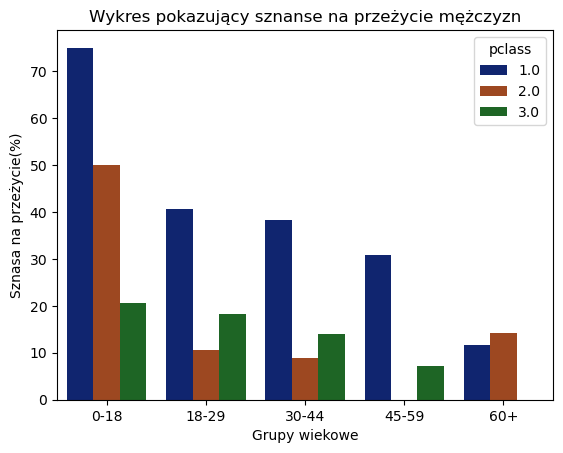

In [ ]:
sns.barplot(x="Age_group", y="percentage_survived", data=male_grouped_age_survived_df, hue="pclass", palette="dark");
plt.title("Wykres pokazujący sznanse na przeżycie mężczyzn")
plt.xlabel("Grupy wiekowe")
plt.ylabel("Sznasa na przeżycie(%)");

Widzimy, że:
* mężczyźni w wieku **od 0-18 lat** mieli około `75%` szans na przeżycie katastrofy
* mężczyźni z klasy 2 **od 0-18 lat** przeżyli w małym stopniu bo `ok. 50%`z nich przeżyło
* męscy pasażerowie z **klasy 2 i 3**, którzy byli **starsi niż 18 lat** meili sznase na przeżycie `21% i mniej`

##### 2. Analiza dla kobiecej częście pasażerów

In [ ]:
female_df=female_df.copy()
female_df["Age_group_num"]=female_df["age"].apply(apply_age_groups_numbers)
female_df["Age_group"]=female_df["age"].apply(apply_age_groups)
female_grouped_age_survived_df=(female_df.groupby(["pclass", "Age_group"]).agg(
        survived_sum=("survived", "sum"),
        survived_count=("survived", "count")
    )
    .reset_index())
female_grouped_age_survived_df["percentage_survived"]=(female_grouped_age_survived_df["survived_sum"]/female_grouped_age_survived_df["survived_count"])*100;

1. Tabela szans na przeżycie kobiet

In [ ]:
female_grouped_age_survived_df.style.pipe(style_with_age_df)

,pclass,Age_group,survived_sum,survived_count,percentage_survived
0,1.000000,0-18,12.000000,13,92.307692
1,1.000000,18-29,29.000000,30,96.666667
2,1.000000,30-44,45.000000,46,97.826087
3,1.000000,45-59,34.000000,35,97.142857
4,1.000000,60+,8.000000,9,88.888889
5,2.000000,0-18,20.000000,21,95.238095
6,2.000000,18-29,36.000000,41,87.804878
7,2.000000,30-44,26.000000,29,89.655172
8,2.000000,45-59,10.000000,11,90.909091
9,2.000000,60+,0.000000,1,0.000000


Mając jedynie jednego pasażera do obserwacji **nie powinniśmy zwracać dużą** uwagę na to, że w kalsie 3 przeżyło `100%` pasażerek w wieku **60+**

2. Wykres szans kobiet na przeżycie

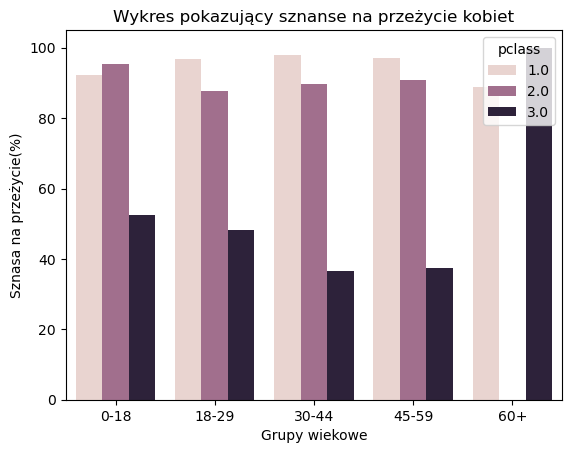

In [ ]:
sns.barplot(x="Age_group", y="percentage_survived", data=female_grouped_age_survived_df, hue="pclass");
plt.title("Wykres pokazujący sznanse na przeżycie kobiet")
plt.xlabel("Grupy wiekowe")
plt.ylabel("Sznasa na przeżycie(%)");


Patrząc na wykres możemy stwierdzić, że:
* kobiety w **1 i 2** klasie niezależnie od wieku miały bardzo dużą szansę na przeżycie `ponad 85%`, nie biorąc pod uwagę wieku **60+** w kalsie 2, gdyż była 1 taka osoba, która nie przeżyła
* natomist w klasie 3 kobiety miały `mniej niż 55%` szans na przeżycie

### 3. Sprawdźmy korelacje między cenami biletu, a przeżywalnością wśród pasażerów

#### 1. Sprawdzamy zaleznosć cen biletów do szans na przeżycie

Tworzymy funkcję do utworzenia kategorii opierając się o ceny biletów

In [ ]:
def apply_fare_groups(cost):
    if cost <20:
        return "0-19"
    elif cost < 40:
        return "20-39"
    elif cost < 80:
        return "40-79"
    elif cost < 100:
        return "80-99"
    elif cost <311:
        return "100-310"
    else:
        return ">310"

In [ ]:
def apply_age_groups_numbers(cost):
    if cost < 19:
        return 1
    elif cost < 30:
        return 2
    elif cost < 45:
        return 3
    elif cost < 60:
        return 4
    elif cost >= 60:
        return 5
    else:
        return 6

In [ ]:
def fare_color(row):
    color_map = {
        "0-19": "orange",
        "20-39": "lightgreen",
        "40-79": "lightblue",
        "80-99": "khaki",
        "100-310": "violet",
        ">310": "lightgray"
    }
    age_group = row['fare_groups']
    color = color_map.get(age_group, '')
    return [f'background-color: {color}; color: black' if col == 'fare_groups' else '' for col in row.index]

def style_with_fare_df(styler):

    cm=sns.light_palette(color="green", as_cmap=True)
    return(
        styler
        # .highlight_max(axis=0, props='color:white;background-color:darkgreen')
        # .highlight_min(axis=0, props='color:white;background-color:darkred')
        .apply(class_color, axis=1)
        .background_gradient(subset="percentage_survived",cmap=cm, axis=0)
        .apply(validate_count, axis=1)
        .apply(fare_color, axis=1)
        # .format(temperature_description, subset=["temperature"])
        # .format(humidity_description, subset=["humidity"])
    )

In [ ]:
df_fare=df.copy()
df_fare["fare_groups"]=df_fare["fare"].apply(apply_fare_groups)
fare_grouped_survived_df=(df_fare.groupby(["fare_groups", "pclass"]).agg(
    survived_sum=("survived", "sum"),
    survived_count=("survived", "count")
).reset_index())

fare_grouped_survived_df["percentage_survived"]=(fare_grouped_survived_df["survived_sum"]/fare_grouped_survived_df["survived_count"])*100

1. Tabela szans na przeżycie patrząc na ceny biletów

In [ ]:
fare_grouped_survived_df.style.pipe(style_with_fare_df)

,fare_groups,pclass,survived_sum,survived_count,percentage_survived
0,0-19,1.000000,1.000000,8,12.500000
1,0-19,2.000000,52.000000,152,34.210526
2,0-19,3.000000,156.000000,593,26.306914
3,100-310,1.000000,56.000000,80,70.000000
4,20-39,1.000000,48.000000,94,51.063830
5,20-39,2.000000,61.000000,109,55.963303
6,20-39,3.000000,19.000000,89,21.348315
7,40-79,1.000000,64.000000,104,61.538462
8,40-79,2.000000,6.000000,16,37.500000
9,40-79,3.000000,6.000000,27,22.222222


Mamy małą próbkę porównawczą, aby zadeklarować, że jeśli pasażer zapłacił za bilet **więcej niż 310** miał ogromne szanse na przeżycie

2. Wykres szans do cen biletów

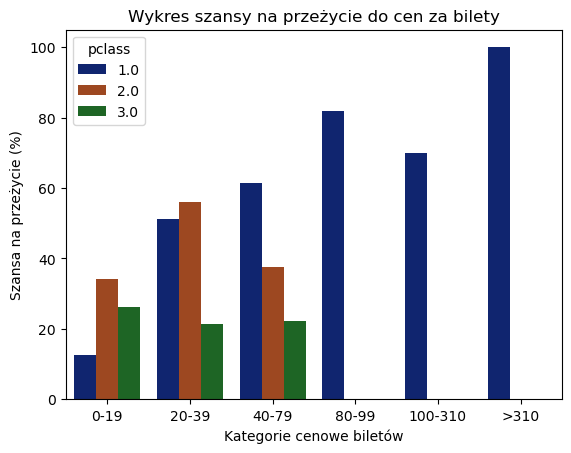

In [ ]:
custom_order = ["0-19", "20-39", "40-79", "80-99", "100-310", ">310"]

# Wymuś kolejność kategorii
fare_grouped_survived_df["fare_groups"] = pd.Categorical(fare_grouped_survived_df["fare_groups"], categories=custom_order, ordered=True)
sns.barplot(x="fare_groups", y="percentage_survived", data=fare_grouped_survived_df, palette="dark", hue="pclass")
plt.title("Wykres szansy na przeżycie do cen za bilety");
plt.xlabel("Kategorie cenowe biletów")
plt.ylabel("Szansa na przeżycie (%)");

Z wykresów możemy wyciągnąc wnosiek, że:
* wśród pasażerów z 1 klasy, którzy kupili bilet za **80-99** przeżyło `81%`
* pasażerowie, z klasy pierwszej, kórzy kupili tańsze bilety w cenie 0-40 mieli mnijesze szanse na przeżycie bo `mniej niż 50%` niżinni w tej klasie

### 4. Przeanalizujmy, czy wielkość rodziny pasażera. Czy ilość rodzeństwa lub małżonek/małżonka wpływała na szanse na przetrwanie

#### 1. Tabela szans na przeżycie uwzględniając ilość małzonek/a/rodzeństwa

In [ ]:
# 
# pcalss_grouped_df.style.background_gradient(subset="percetage_survived",cmap=cm, axis=0)

def sibsp_color(row):
    color_map = {
        0: "lightgray",
        1: "lightgreen",
        2: "lightskyblue",
        3: "lightcoral",
        4: "gold",
        5: "plum",
        6: "darkseagreen",
        7: "salmon",
        8: "mediumslateblue"
    }
    value = row['sibsp']
    color = color_map.get(value, '')
    return [f'background-color: {color}; color: black' if col == 'sibsp' else '' for col in row.index]



def style_with_sibsp_df(styler):

    cm=sns.light_palette(color="green", as_cmap=True)
    return(
        styler
        # .highlight_max(axis=0, props='color:white;background-color:darkgreen')
        # .highlight_min(axis=0, props='color:white;background-color:darkred')
        .apply(class_color, axis=1)
        .background_gradient(subset="percentage_survived",cmap=cm, axis=0)
        .apply(validate_count, axis=1)
        .apply(sibsp_color, axis=1)
        # .format(temperature_description, subset=["temperature"])
        # .format(humidity_description, subset=["humidity"])
    )




In [ ]:

sibps_grouped_survived_df=(df.groupby(["sibsp","pclass"]).agg(
   survived_sum= ("survived", "sum"),
    survived_count= ("survived", "count")
).reset_index())
sibps_grouped_survived_df["percentage_survived"]=(sibps_grouped_survived_df["survived_sum"]/sibps_grouped_survived_df["survived_count"])*100


#### 2. Wykres szans na przeżycie uwzględniając ilość małzonek/a/rodzeństwa

In [ ]:
sibps_grouped_survived_df.style.pipe(style_with_sibsp_df)

,sibsp,pclass,survived_sum,survived_count,percentage_survived
0,0.000000,1.000000,111.000000,198,56.060606
1,0.000000,2.000000,69.000000,182,37.912088
2,0.000000,3.000000,129.000000,511,25.244618
3,1.000000,1.000000,79.000000,113,69.911504
4,1.000000,2.000000,43.000000,82,52.439024
5,1.000000,3.000000,41.000000,124,33.064516
6,2.000000,1.000000,7.000000,8,87.500000
7,2.000000,2.000000,6.000000,12,50.000000
8,2.000000,3.000000,6.000000,22,27.272727
9,3.000000,1.000000,3.000000,4,75.000000


Patrząc na tabelę nie możemy bardzo skupiać na tym, że szanse  na przeżycie w pasażera, który **miał 3 małzonek/a/rodzeństwa** na pokładzie, w klasie 2 wynosiły `100%`, gdyż mieliśmy 1 takiego pasażera do obserwacji

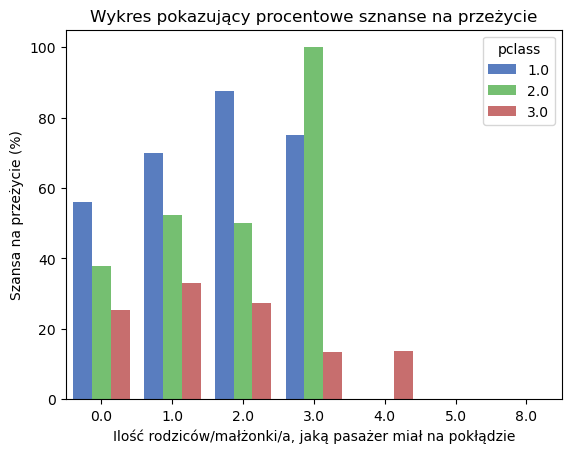

In [ ]:
sns.barplot(x="sibsp", y="percentage_survived", hue="pclass", data=sibps_grouped_survived_df, palette="muted6");
plt.title("Wykres pokazujący procentowe sznanse na przeżycie");
plt.xlabel("Ilość rodziców/małżonki/a, jaką pasażer miał na pokłądzie")
plt.ylabel("Szansa na przeżycie (%)");

Możemy tu zauważyć, że wśród pasażerów z klasy pierwszej, którzy mieli 2 rodziców/żony/męża na pokładzie przeżyło `88%` z nich

### 5. Wpływ ilości rodziców/dzieci na szansę na przeżycie pasażera

#### 1. Tabela szans na przeżycie uwzględniając ilość rodziców/dzieci

In [ ]:
# 
# pcalss_grouped_df.style.background_gradient(subset="percetage_survived",cmap=cm, axis=0)

def parch_color(row):
    color_map = {
        0: "lightgray",
        1: "lightgreen",
        2: "lightskyblue",
        3: "lightcoral",
        4: "gold",
        5: "plum",
        6: "darkseagreen",
        7: "salmon",
        8: "mediumslateblue",
        9: "saphire"
    }
    value = row['parch']
    color = color_map.get(value, '')
    return [f'background-color: {color}; color: black' if col == 'parch' else '' for col in row.index]



def style_parch_df(styler):

    cm=sns.light_palette(color="green", as_cmap=True)
    return(
        styler
        # .highlight_max(axis=0, props='color:white;background-color:darkgreen')
        # .highlight_min(axis=0, props='color:white;background-color:darkred')
        .apply(class_color, axis=1)
        .background_gradient(subset="percentage_survived",cmap=cm, axis=0)
        .apply(validate_count, axis=1)
        .apply(parch_color, axis=1)
        # .format(temperature_description, subset=["temperature"])
        # .format(humidity_description, subset=["humidity"])
    )




In [ ]:
parch_grouped_survived_df=(df.groupby(["parch","pclass"]).agg(
   survived_sum= ("survived", "sum"),
    survived_count= ("survived", "count")
).reset_index())
parch_grouped_survived_df["percentage_survived"]=(parch_grouped_survived_df["survived_sum"]/parch_grouped_survived_df["survived_count"])*100

parch_grouped_survived_df.style.pipe(style_parch_df)

,parch,pclass,survived_sum,survived_count,percentage_survived
0,0.000000,1.000000,141.000000,242,58.264463
1,0.000000,2.000000,64.000000,206,31.067961
2,0.000000,3.000000,131.000000,554,23.646209
3,1.000000,1.000000,36.000000,50,72.000000
4,1.000000,2.000000,31.000000,43,72.093023
5,1.000000,3.000000,33.000000,77,42.857143
6,2.000000,1.000000,21.000000,27,77.777778
7,2.000000,2.000000,21.000000,25,84.000000
8,2.000000,3.000000,15.000000,61,24.590164
9,3.000000,1.000000,1.000000,2,50.000000


Wyników procentowych sans na przeżycie nie powinniśmy brać dosadnie dla pasażerów, którzy **mieli od 3 do 9 rodziców/dzieci** ze sobą na pokładzie, gdyż takich pasażerów było **stosunkowo mało**

#### 2. Wykres szans na przeżycie uwzględniając ilość rodziców/dzieci

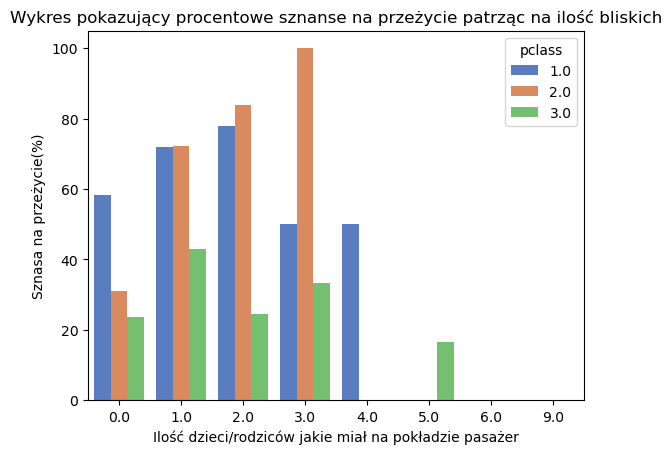

In [ ]:
sns.barplot(x="parch", y="percentage_survived", hue="pclass", data=parch_grouped_survived_df, palette="muted");
plt.title("Wykres pokazujący procentowe sznanse na przeżycie patrząc na ilość bliskich");
plt.ylabel("Sznasa na przeżycie(%)");
plt.xlabel("Ilość dzieci/rodziców jakie miał na pokładzie pasażer");

Możemy tu zauważyć, że wśród pasażerów z klasy drugiej, którzy mieli 2 dzieci/rodziców na pokładzie przeżyło `84%` z nich

## 6. Szukamy odstających wartości

#### 1. Wykres pudłkowy dla wszystkich pasażerów

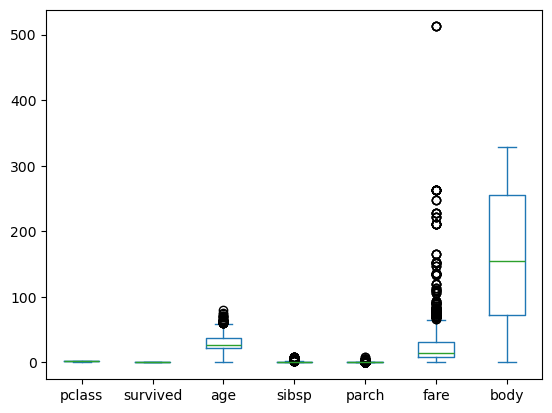

In [ ]:
df.plot(kind="box");

Widzimy, że:
- jest wiele odstających wartości w kolumnie age, to znaczy, że na statku były również osoby w zaawansowanym wieku,
- są wartości odstające w koumnie sibsp i parch, znaczy, to, że na statku były roziny wielodzietne,
- widzimy wiele wartości odstających dla kolumny fare,co oznacza, że wiele biletów na statek było znacznie droższych od normalnych biletów


#### 2. Wykres pudłkowy dla pasażerów klasy 3

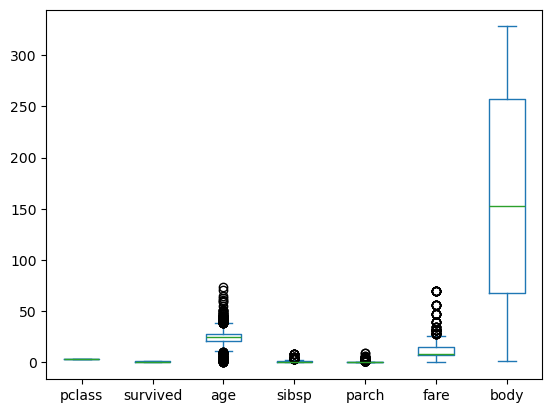

In [ ]:
classs_3_df.plot(kind="box");

Możemy zauwazyć, że wartości odstające dla pasażerów klasy 3 są podobne do wartości odstających u wszystkkich pasażerów,
lecz możemy zauważyć, że w tej klasie nie było biletu, kktóry tak znacząco odbiegałby ceną od innych

#### 3. Wykres pudłkowy dla pasażerów klasy 2

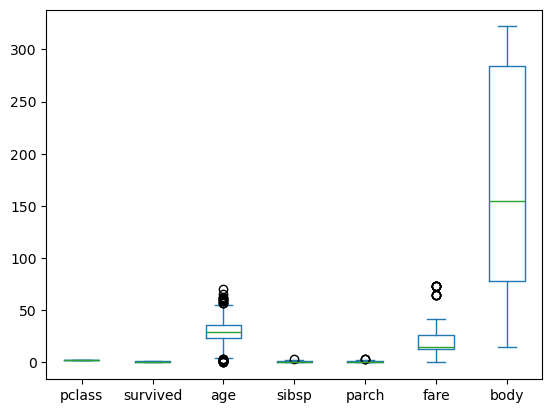

In [ ]:
classs_2_df.plot(kind="box");

W klasie 2 obserwujemy, że na pokładzie było lub były bardzo małe dzieci, a także nie było wiele odstających ceną od normy biletów

#### 4. Wykres pudłkowy dla pasażerów klasy 1

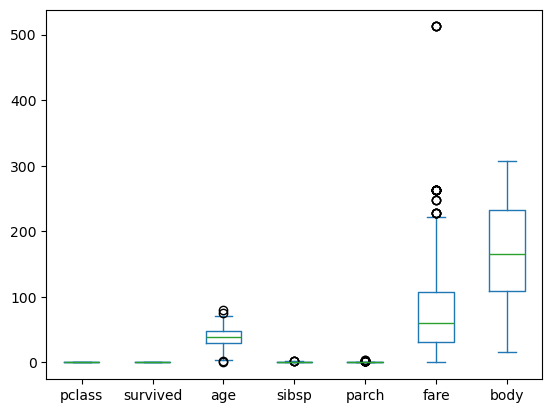

In [ ]:
classs_1_df.plot(kind="box");

Niektóre ceny biletów w klasie 1 były znacznie wygórowane od innych cen biletów w tej klasie

### 7. Podsumowanie

Podsumowując znależliśmy w danych, że:
- na pokładzie statku było więcej mężczyzn niż kobiet
- katastrofę przeżyło `500 osób`
- **najwięcej osób** przeżyło z 1 klasy, a najmniej z 3
- przeżyło **więcej** kobiet niż mężczyzn
- kobiety **w 1 i 2** klasie miały bardzo duże na przeżycie, około `90%` niezależnie od wieku
- w **klasie 3** szanse na przeżycie kobiet uwzględniając wiek były **znaczie mniejsze**, bo wynosiły od `55%` szans do `33%`
- mężczyźni **patrząc na wszytskie klasy** mieli bardzo małe szanse na przeżycie, bo mniejsze niż `35%`
- mężczyźni z **klasy 1** w wieku `0-18` przeżyli w 75% procentach, lecz wszytskich mężczyzn w tym wieku **w klasie 1** było `jedynie 8`
- katastrofę przeżyło dość spora część pasażerów, `bo około 75%` **z klasy 1 i 2**, którzy mieli na pokładzie **1 lub 2** członków rodziny
<!-- - w niektórych klasach wiek wpływał na szansę na uratwanie się z katastrofy
- cena biletu niezależnie od klasy nie miała związku z szansą na przeżycie
- jeżeli członkowie statku posiadali większe rodziny szansa na ich przeżycie malała -->